In [60]:

import tensorflow as tf
import os

In [61]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.expermental.set_memory_growth(gpu,True)

In [62]:
data_dir = "C:/Users/krish/Downloads/data"

In [63]:
image_ext = ['jpeg']

In [64]:
os.listdir(data_dir)

['data', '__MACOSX']

In [65]:
import matplotlib.pyplot as plt

In [66]:
pip install opencv-python

In [67]:
import cv2
import imghdr

In [68]:
img = cv2.imread(os.path.join('/Users/krish/Downloads/data/data','rain','1503.jpg'))

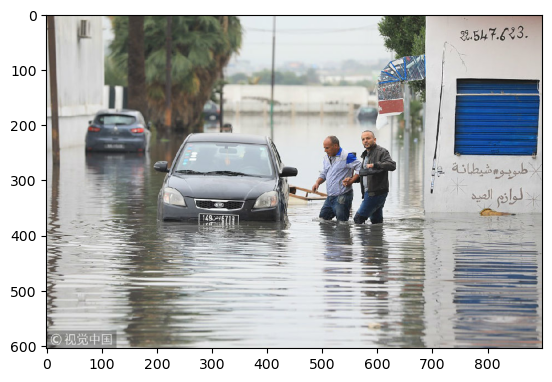

In [69]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
import numpy as np

In [71]:
#data = tf.keras.preprocessing.image.ImageDataGenerator('/Users/krish/Downloads/data/data')
data = tf.keras.utils.image_dataset_from_directory('/Users/krish/Downloads/data/data')

Found 2216 files belonging to 4 classes.


In [72]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [73]:
data_iterator = data.as_numpy_iterator()

In [74]:
batch = data_iterator.next()

In [75]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#CLass

In [76]:
batch[1]

array([2, 1, 2, 2, 3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 0, 0, 2, 1, 1, 2])

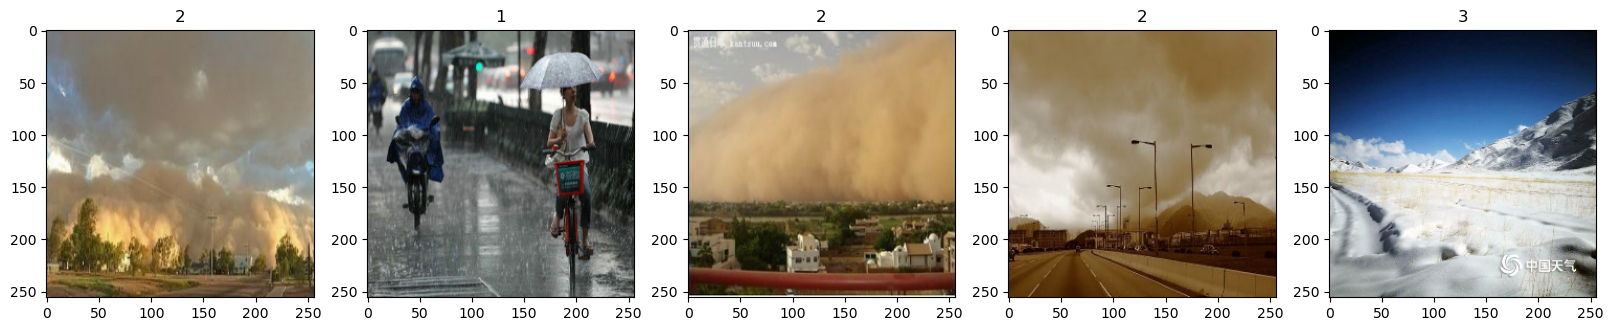

In [114]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [78]:
# Class 0 - Lightning 1 - rain 2 - sandstorm 3 -  snow

In [79]:
# Preprocessing data
# Scaling image values to 0 and 1 instead of 0 255 to generate faster results

In [80]:
batch[0].min()

0.0

In [81]:
# Scaling

In [82]:
data = data.map(lambda x,y: (x/255,y))

In [83]:
data.as_numpy_iterator().next()[0].max()

1.0

In [84]:
data.as_numpy_iterator().next()[0].min()

0.0

In [85]:
# Train - Validation - Test split

In [86]:
len(data)

70

In [87]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1


In [88]:
train_size + val_size + test_size

71

In [89]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + test_size).take(test_size)

In [90]:
len(train)

49

In [91]:
len(test)

8

In [92]:
len(val)

14

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Layers for CNN


In [94]:
model = Sequential()

In [95]:
model.add(Conv2D(16, (3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
          




In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 32)       

In [98]:
#Training a model

In [99]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
49/49 [==============================] - 32s 567ms/step - loss: 0.6922 - accuracy: 0.7315 - val_loss: 0.4300 - val_accuracy: 0.8415
Epoch 2/10
49/49 [==============================] - 23s 463ms/step - loss: 0.3261 - accuracy: 0.8890 - val_loss: 0.3321 - val_accuracy: 0.8817
Epoch 3/10
49/49 [==============================] - 21s 431ms/step - loss: 0.2658 - accuracy: 0.8999 - val_loss: 0.3483 - val_accuracy: 0.8638
Epoch 4/10
49/49 [==============================] - 23s 464ms/step - loss: 0.2041 - accuracy: 0.9330 - val_loss: 0.2327 - val_accuracy: 0.9062
Epoch 5/10
49/49 [==============================] - 24s 478ms/step - loss: 0.1587 - accuracy: 0.9458 - val_loss: 0.2185 - val_accuracy: 0.9152
Epoch 6/10
49/49 [==============================] - 24s 488ms/step - loss: 0.1131 - accuracy: 0.9656 - val_loss: 0.3919 - val_accuracy: 0.8683
Epoch 7/10
49/49 [==============================] - 21s 425ms/step - loss: 0.0986 - accuracy: 0.9707 - val_loss: 0.2793 - val_accuracy: 0.9085

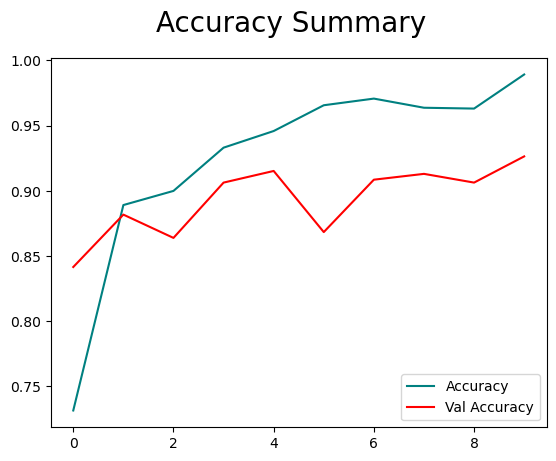

In [101]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'Val Accuracy')
fig.suptitle('Accuracy Summary', fontsize = 20)
plt.legend(loc='lower right')
plt.show()

In [104]:
#Evaluating

In [105]:
from tensorflow.keras.metrics import Precision, Recall

In [108]:
img = cv2.imread('C:/Users/krish/Downloads/data/data/snow/0867.jpg')

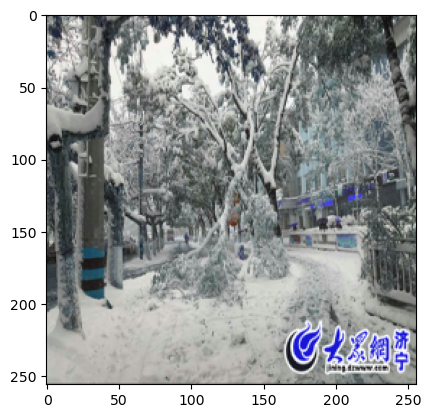

In [109]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 1s 797ms/step


array([[5.3282424e-11, 2.1173547e-04, 3.6699426e-16, 9.9978822e-01]],
      dtype=float32)

In [116]:
#Class 3 is closer to 1 , therefore the predicted class is 3 i.e snow!

In [127]:
img = cv2.imread('C:/Users/krish/Downloads/data/data/lightning/1981.jpg')

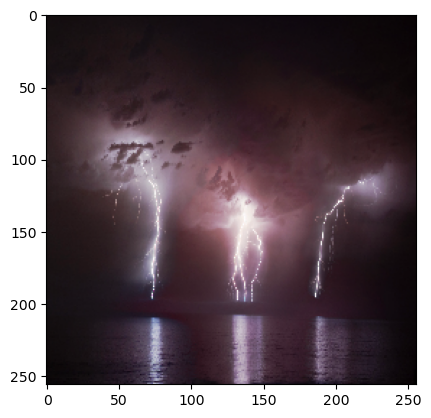

In [128]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [129]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 76ms/step


array([[9.9914300e-01, 3.7867535e-04, 3.6553593e-05, 4.4168983e-04]],
      dtype=float32)

In [130]:
#Class0 - Lightning